Based on the
[Batman Curve](http://mathworld.wolfram.com/BatmanCurve.html)

In [1]:
using PyPlot

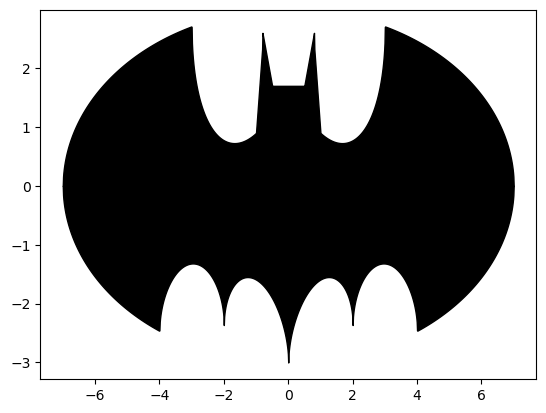

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/morgan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


PyObject <matplotlib.collections.PolyCollection object at 0x7efdfbbca8c0>

In [2]:
p(x, f) = fill_between(x, f.(x), color="black" )

function bat(x; positive=true)
    H(x) = x >= 0 ? 1.0 : 0.0
    σ(x) = @. √(1-x^2.0)
    e(x) = @. 3σ(x/7.0)
    s(x) = @. 4.2 - 0.5x - 2.8σ(0.5x-0.5)
    b(x) = @. σ(abs(2-x)-1)-x.^2/11 + 0.5x - 3
    q(x) = @. 7.5*x*sign(-x) + 8.4
    j(x) = @. -3.0*x*sign(-x) + 0.2
    k(x) = @. 1.7
    c(x) = [1.7, 1.7, 2.6, 0.9]
    if positive
        if abs(x)>7
            return 0
        elseif abs(x) > 3
            return e.(abs.(x))
        elseif abs(x) > 1
            return s.(abs.(x))
        elseif abs(x) > 0.8
            return q(x)
        elseif abs(x) > 0.5
            return j(x)
        else
            return k(x)
        end
    else
        if abs(x)>7
            return 0
        elseif abs(x) > 4
            return -e.(abs.(x))
        else
            return b(abs.(x))
        end
    end
end

p(-7:0.01:7, a->bat(a; positive=false) )
p(-7:0.01:7, a->bat(a; positive=true) )
#plt.axis("off")
#plt.savefig("logo.svg")

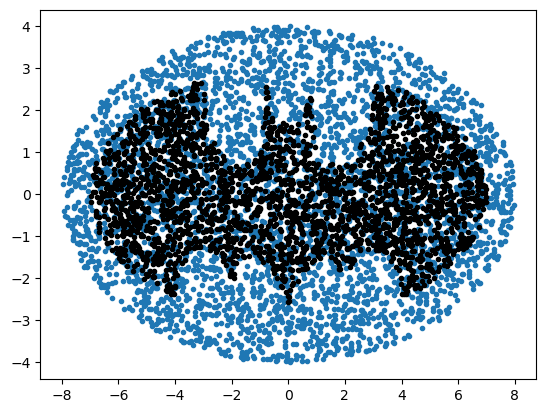

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7efdee1be380>

In [3]:
## MCBat
using Random
using Seaborn

function in_bat(x, y)
    if y >= 0
        if y <= bat(x; positive=true)
            true
        else
            false
        end
    else
        if y >= bat(x; positive=false)
            true
        else
            false
        end
    end
end

function noise(count)
    rx = rand(Float64, count).*16 .- 8
    ry = rand(Float64, count).*8 .- 4
    a, b = 8, 4
    s = @. ((ry/b)^2 + (rx/a)^2 < 1)
    return rx[s], ry[s]
end

ev = 5000

tx = rand(Float64, ev).*14 .- 7
ty = rand(Float64, ev).*6 .- 3

selection = in_bat.(tx, ty)

nx, ny = noise(ev)
plt.plot(nx, ny, ".")

plt.plot(tx[selection], ty[selection], ".", color="black")



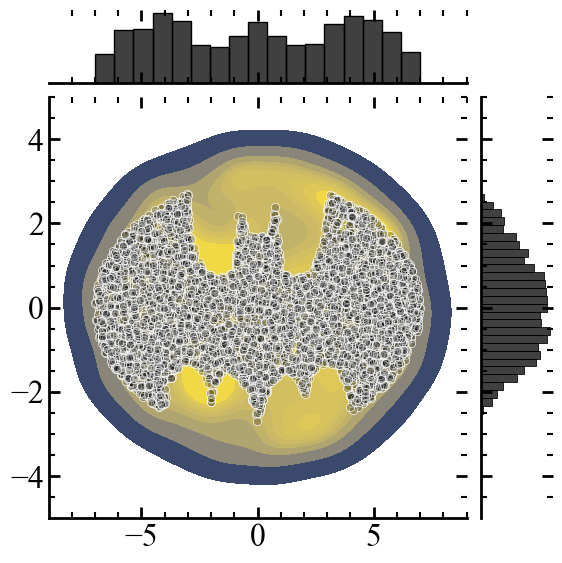

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [4]:
## MCBat
using Random
plt.style.use("bat.mplstyle")
using Seaborn

Random.seed!(13)


function in_bat(x, y)
    if y >= 0
        if y <= bat(x; positive=true)
            true
        else
            false
        end
    else
        if y >= bat(x; positive=false)
            true
        else
            false
        end
    end
end

function noise(count)
    rx = rand(Float64, count).*16 .- 8
    ry = rand(Float64, count).*8 .- 4
    a, b = 8, 4
    s = @. ((ry/b)^2 + (rx/a)^2 < 1)
    return rx[s], ry[s]
end

ev = 10000

tx = rand(Float64, ev).*14 .- 7
ty = rand(Float64, ev).*6 .- 3

selection = in_bat.(tx, ty)

nx, ny = noise(ev)
bx, by = tx[selection], ty[selection]
#plt.plot(nx, ny, ".")

#plt.plot(tx[selection], ty[selection], ".", color="black")

# g = jointplot(bx, by, kind="scatter", color=(0,0,0,0.2), 
#     xlim=(-9,9), ylim=(-5,5), zorder=2)
#g = kdeplot(bx, by, color=(0,0,0))
#kdeplot(nx, ny)
#g.x = nx
#g.y = ny
#g.plot_joint(kdeplot, zorder=1, shade=true)

g = jointplot(bx, by, kind="scatter", color=(0,0,0,0.2), 
    xlim=(-9,9), ylim=(-5,5), zorder=2)
g.x = nx
g.y = ny
g.plot_joint(kdeplot, zorder=1, shade=true, cmap="cividis")

savefig("logo.svg", transparent=true)